## Carla Traffic Lights Images
### 신호등 이미지 분류
https://www.kaggle.com/datasets/sachsene/carla-traffic-lights-images

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [1]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/train/'
validation_dir = './datasets/validation/'
test_dir = './datasets/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [2]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['back', 'green', 'red', 'yellow']


In [3]:
# # 이미지 별 폴더 안 이미지들의 파일명 변경
# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(train_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(train_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(train_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(validation_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(validation_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(validation_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

# for name in directory_names:
#     for i, file_name in enumerate(os.listdir(os.path.join(test_dir, name))):
#         # 이전 파일의 전체 경로
#         old_file = os.path.join(test_dir + name + '/', file_name)
#         # 신규 파일 전체 경로 작성
#         new_file = os.path.join(test_dir + name + '/', name + str(i + 1) + '.png')

#         # 이전 파일의 이름을 신규 파일로 변경
#         os.rename(old_file, new_file)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
train_generator = idg.flow_from_directory(train_dir,
                                          target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          shuffle=True)

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
validation_generator = idg.flow_from_directory(validation_dir,
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
test_generator = idg.flow_from_directory(test_dir,
                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                         batch_size=BATCH_SIZE,
                                         class_mode='categorical')

# 각 클랙스의 이름과 인덱스 출력
print(train_generator.class_indices)
print(validation_generator.class_indices)
print(test_generator.class_indices)

Found 1714 images belonging to 4 classes.
Found 383 images belonging to 4 classes.
Found 429 images belonging to 4 classes.
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}
{'back': 0, 'green': 1, 'red': 2, 'yellow': 3}


In [5]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in train_generator.class_indices.items()}
target_name

{0: 'back', 1: 'green', 2: 'red', 3: 'yellow'}

In [6]:
# 각 타겟의 이름 담을 초기 list 선언
tarin_target_names = []
validation_target_names = []
test_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in train_generator.classes:
    tarin_target_names.append(target_name[target])

for target in validation_generator.classes:
    validation_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(tarin_target_names.__len__(), validation_target_names.__len__(), test_target_names.__len__())

1714 383 429


In [7]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
train_df = pd.DataFrame({'file_paths': train_generator.filepaths, 'target_names': tarin_target_names, 'targets': train_generator.classes})
train_df.file_paths = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_generator.filepaths, 'target_names': validation_target_names, 'targets': validation_generator.classes})
validation_df.file_paths = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df)
display(validation_df)
display(test_df)

file_paths target_names  targets
0          ./datasets/train/back/back1.png         back        0
1         ./datasets/train/back/back10.png         back        0
2        ./datasets/train/back/back101.png         back        0
3        ./datasets/train/back/back103.png         back        0
4        ./datasets/train/back/back104.png         back        0
...                                    ...          ...      ...
1709  ./datasets/train/yellow/yellow92.png       yellow        3
1710  ./datasets/train/yellow/yellow94.png       yellow        3
1711  ./datasets/train/yellow/yellow95.png       yellow        3
1712  ./datasets/train/yellow/yellow96.png       yellow        3
1713  ./datasets/train/yellow/yellow98.png       yellow        3

[1714 rows x 3 columns]

file_paths target_names  targets
0         ./datasets/validation/back/back_1.jpg         back        0
1        ./datasets/validation/back/back_10.jpg         back        0
2       ./datasets/validation/back/back_100.png         back        0
3        ./datasets/validation/back/back_11.jpg         back        0
4        ./datasets/validation/back/back_12.jpg         back        0
..                                          ...          ...      ...
378  ./datasets/validation/yellow/yellow_80.jpg       yellow        3
379  ./datasets/validation/yellow/yellow_81.jpg       yellow        3
380  ./datasets/validation/yellow/yellow_82.jpg       yellow        3
381  ./datasets/validation/yellow/yellow_83.jpg       yellow        3
382   ./datasets/validation/yellow/yellow_9.jpg       yellow        3

[383 rows x 3 columns]

file_paths target_names  targets
0       ./datasets/test/back/back100.png         back        0
1       ./datasets/test/back/back102.png         back        0
2       ./datasets/test/back/back112.png         back        0
3       ./datasets/test/back/back114.png         back        0
4       ./datasets/test/back/back127.png         back        0
..                                   ...          ...      ...
424  ./datasets/test/yellow/yellow87.png       yellow        3
425  ./datasets/test/yellow/yellow91.png       yellow        3
426  ./datasets/test/yellow/yellow93.png       yellow        3
427  ./datasets/test/yellow/yellow97.png       yellow        3
428  ./datasets/test/yellow/yellow99.png       yellow        3

[429 rows x 3 columns]

In [48]:
# 타겟 데이터 비중 확인
train_target = train_df.target_names.value_counts().reset_index()
validation_target = validation_df.target_names.value_counts().reset_index()
test_target = test_df.target_names.value_counts().reset_index()

In [49]:
display(train_target)
display(validation_target)
display(test_target)

target_names  count
0          red    451
1        green    447
2         back    414
3       yellow    402

target_names  count
0         back    100
1        green    100
2          red    100
3       yellow     83

target_names  count
0          red    113
1        green    112
2         back    103
3       yellow    101

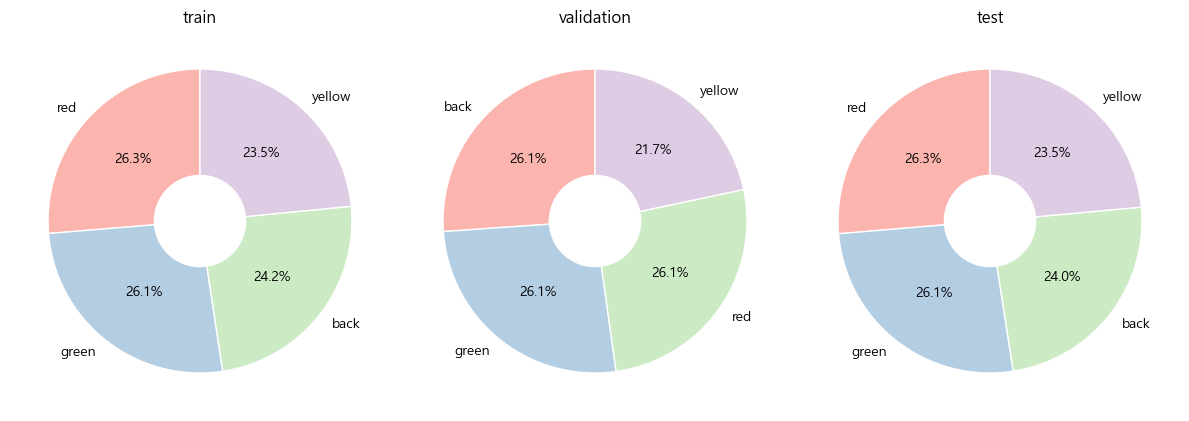

In [52]:
# 타겟 데이터 비중 변경 전/후 차이 그래프 확인
fig, axes = plt.subplots(1, 3, figsize=(12,5))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

train_counts = train_target['count']
train_labels = train_target['target_names']
val_counts = validation_target['count']
val_labels = validation_target['target_names']
test_counts = test_target['count']
test_labels = test_target['target_names']

# 그래프 그리기
axes[0].pie(train_counts, labels=train_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('train')
axes[1].pie(val_counts, labels=val_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[1].set_title('validation')
axes[2].pie(test_counts, labels=test_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[2].set_title('test')

plt.tight_layout()
plt.show()

In [11]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(1714, 3)
(383, 3)
(429, 3)


### 📊 유사도 예측

In [12]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [13]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [14]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [15]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [17]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 좌우 반전
    A.HorizontalFlip(p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

In [18]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(4, 244, 244, 3) (4, 4)


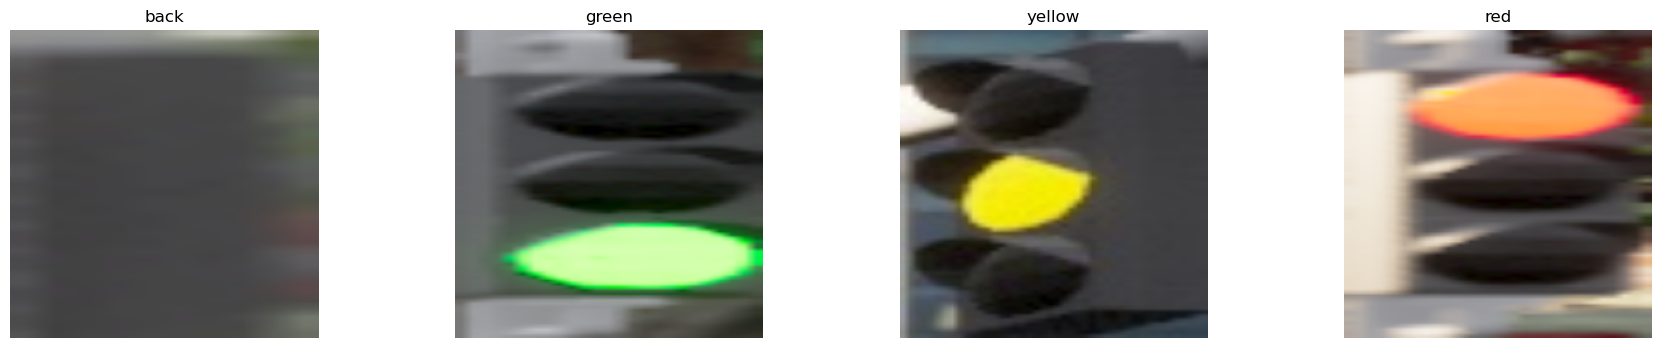

In [19]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=4, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
[[('n03777754', 'modem', 0.26507375), ('n04152593', 'screen', 0.20546506), ('n03761084', 'microwave', 0.04768337), ('n04330267', 'stove', 0.044967942), ('n03782006', 'monitor', 0.037834093)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
[[('n04152593', 'screen', 0.08940026), ('n04501370', 'turnstile', 0.06415051), ('n03920288', 'Petri_dish', 0.06399439), ('n03924679', 'photocopier', 0.04933141), ('n02840245', 'binder', 0.039556425)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
[[('n03544143', 'hourglass', 0.1369986), ('n03929660', 'pick', 0.084112465), ('n03271574', 'electric_fan', 0.06575854), ('n04355933', 'sunglass', 0.045903165), ('n03937543', 'pill_bottle', 0.03800959)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
[[('n03041632', 'cleaver', 0.17239597), ('n04357314', 'sunscreen', 0.13677995), ('n03690938', 'lotion', 0.03047192), ('n03920288', 'Petri_dish', 0.026375122), ('n01855032', 'red-breasted_merganser', 0.024026435)]]


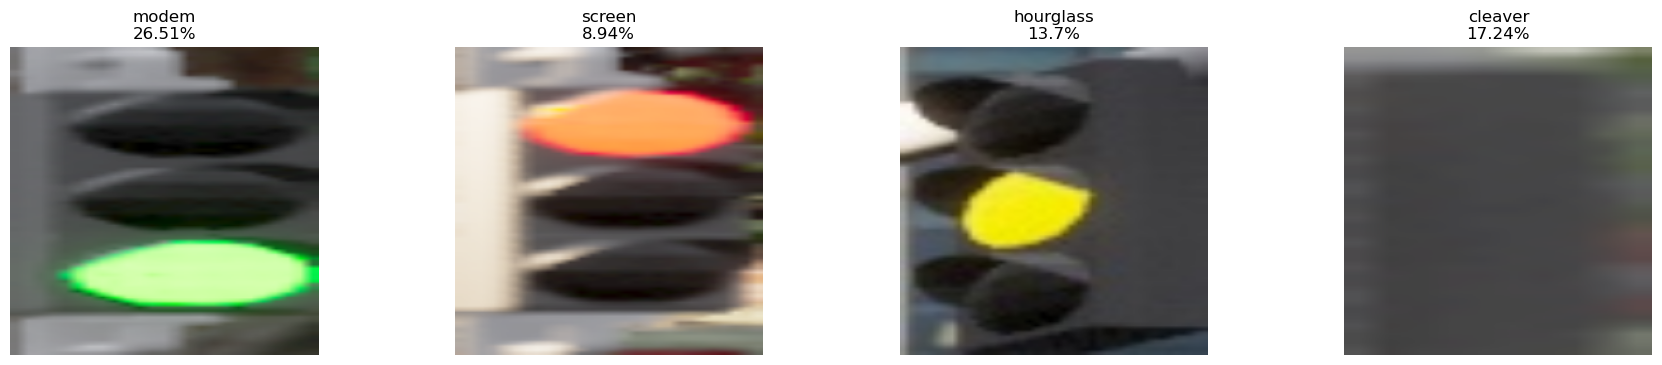

In [20]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n02089973', 'English_foxhound', 1.0), ('n02356798', 'fox_squirrel', 1.6200508e-20), ('n01855032', 'red-breasted_merganser', 1.3222418e-28), ('n02105056', 'groenendael', 3.5405708e-34), ('n02085782', 'Japanese_spaniel', 3.2533264e-34)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
[[('n07613480', 'trifle', 1.0), ('n03706229', 'magnetic_compass', 4.3102872e-11), ('n01688243', 'frilled_lizard', 1.0721134e-11), ('n02089973', 'English_foxhound', 4.3214963e-12), ('n02123597', 'Siamese_cat', 1.8844683e-12)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[('n02883205', 'bow_tie', 1.0), ('n02089973', 'English_foxhound', 3.4155082e-35), ('n07613480', 'trifle', 6.430489e-36), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
[[('n02089973', 'English_foxhound', 1.0), ('n02105056', 'groenendael', 2.502099e-14), ('n01855032', 'red-breasted_merganser', 1.14674505e-17), ('n01688243', 'frilled_lizard', 2.025

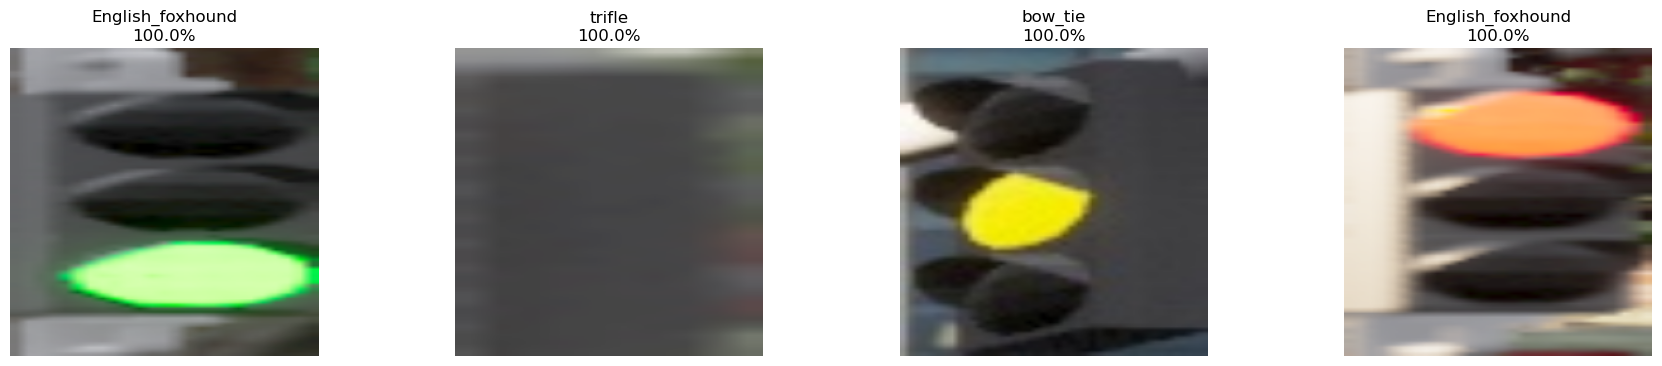

In [21]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03775546', 'mixing_bowl', 0.99999976), ('n03942813', 'ping-pong_ball', 2.414059e-07), ('n04127249', 'safety_pin', 1.3482078e-12), ('n04485082', 'tripod', 9.372675e-34), ('n04116512', 'rubber_eraser', 5.4780553e-34)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
[[('n03942813', 'ping-pong_ball', 0.9999738), ('n03775546', 'mixing_bowl', 2.6191512e-05), ('n04127249', 'safety_pin', 1.7077494e-14), ('n04149813', 'scoreboard', 7.385559e-17), ('n02834397', 'bib', 1.02414246e-19)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[[('n03942813', 'ping-pong_ball', 0.99893934), ('n03775546', 'mixing_bowl', 0.0010503299), ('n04116512', 'rubber_eraser', 1.0360667e-05), ('n04380533', 'table_lamp', 4.5605425e-12), ('n04149813', 'scoreboard', 4.06959e-12)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
[[('n03775546', 'mixing_bowl', 0.7169221), ('n04127249', 'safety_pin', 0.28307793), ('n03942813', 'ping-pong_ball', 1.3781141e-14), ('n04116512', 'rubber_eraser', 3.8342998e-

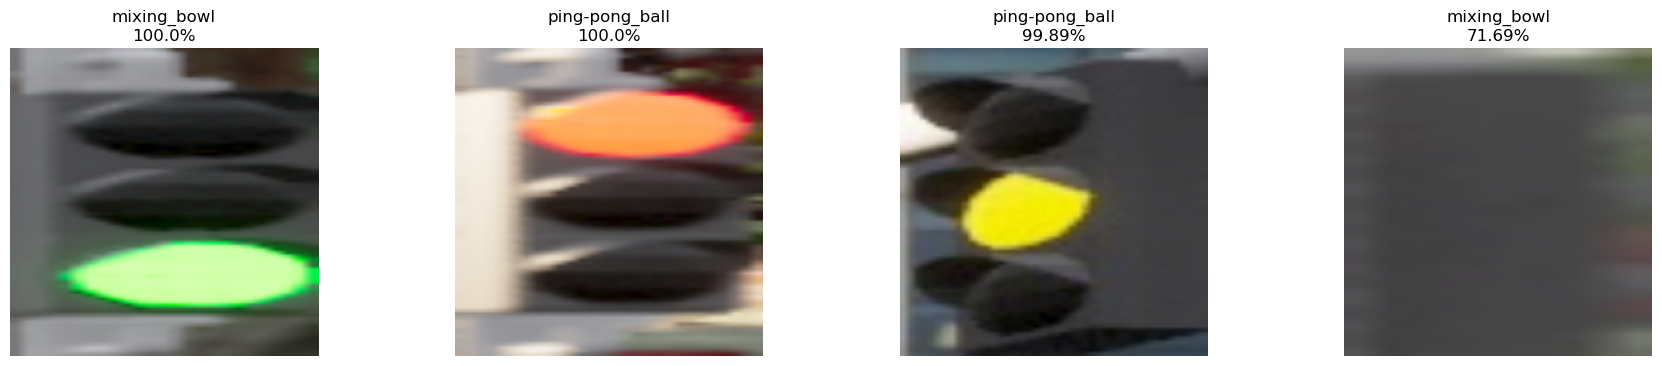

In [22]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[('n04589890', 'window_screen', 0.48497546), ('n04070727', 'refrigerator', 0.032470204), ('n04507155', 'umbrella', 0.019996038), ('n04209239', 'shower_curtain', 0.017325668), ('n02783161', 'ballpoint', 0.014901265)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[('n04589890', 'window_screen', 0.6365664), ('n04590129', 'window_shade', 0.23523577), ('n04209239', 'shower_curtain', 0.023405408), ('n02977058', 'cash_machine', 0.020685341), ('n04152593', 'screen', 0.012119804)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[('n04209239', 'shower_curtain', 0.17167702), ('n03347037', 'fire_screen', 0.15507582), ('n04589890', 'window_screen', 0.08461113), ('n04152593', 'screen', 0.043153442), ('n02977058', 'cash_machine', 0.03167722)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[('n04209239', 'shower_curtain', 0.5566325), ('n04589890', 'window_screen', 0.24996774), ('n04590129', 'window_shade', 0.038142983), ('n04507155', 'umbrella', 0.03119489), ('n03938244', 'p

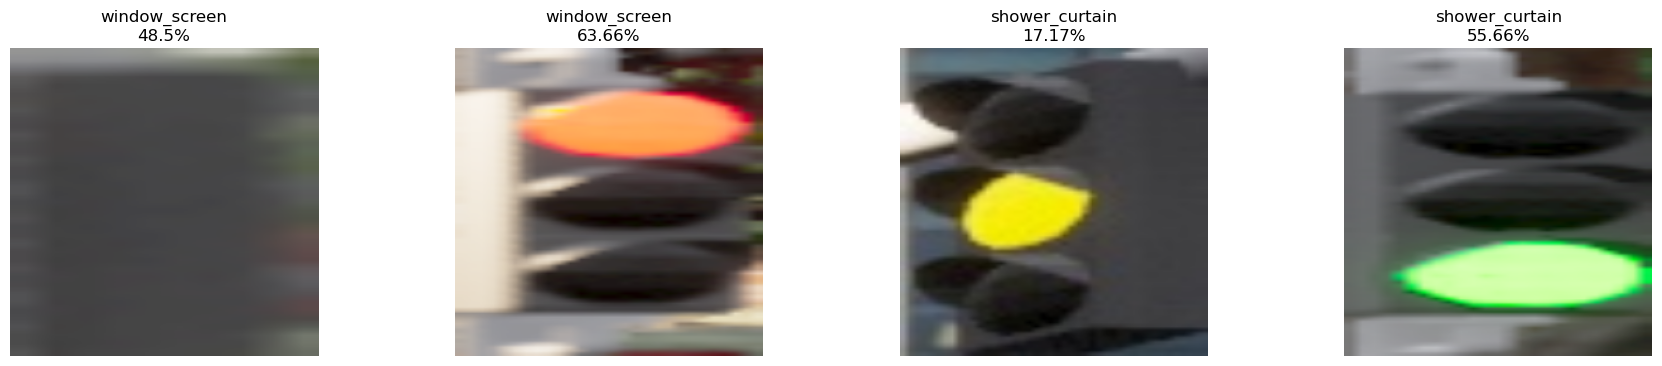

In [23]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet50v2_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input

def create_dataset(paths, targets, BATCH_SIZE, preprocess_input, shuffle=True):
    # VGG16 선택
    if preprocess_input == 'vgg16':
        preprocess_input = vgg_preprocess_input
    # ResNet50V2 선택
    elif preprocess_input == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        preprocess_input = resnet50v2_preprocess_input
    # Xception 선택
    elif preprocess_input == 'xception': # Inception을 기초로 한 모델
        preprocess_input = xception_preprocess_input
    # preprocess_input 선택
    elif preprocess_input == 'mobilenet':
        preprocess_input = mobilenetv2_preprocess_input
        
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   preprocess=preprocess_input,
                   shuffle=True)

### 🌟 1Cycle

In [26]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(4, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [22]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [29]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/1cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_18472\1645948085.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,238 (8.86 MB)

 Trainable params: 2,288,126 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [32]:
import gc 

gc.collect()

31675

In [33]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 165s 599ms/step - acc: 0.7934 - loss: 0.6003 - val_acc: 0.6789 - val_loss: 1.2536 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 168s 781ms/step - acc: 0.9629 - loss: 0.1293 - val_acc: 0.5953 - val_loss: 2.4725 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 171s 796ms/step - acc: 0.9741 - loss: 0.1329 - val_acc: 0.4883 - val_loss: 3.3029 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 164s 764ms/step - acc: 0.9944 - loss: 0.0278 - val_acc: 0.8616 - val_loss: 0.7212 - learning_rate: 1.0000e-04
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 174s 812ms/step - acc: 0.9950 - loss: 0.0271 - val_acc: 0.9504 - val_loss: 0.1955 - learning_rate: 1.0000e-04
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 168s 781ms/step - acc: 0.9978 - loss: 0.0156 - val_acc: 0.9974 - val_loss: 0.0395 - learning_rate: 1.0000e-04
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 175s 816ms/step - acc: 0.9986 - loss: 0.0188 - val_acc: 0.9974 - val_loss: 0.0245 -

In [34]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - acc: 1.0000 - loss: 2.8394e-06


[1.788474492059322e-06, 1.0]

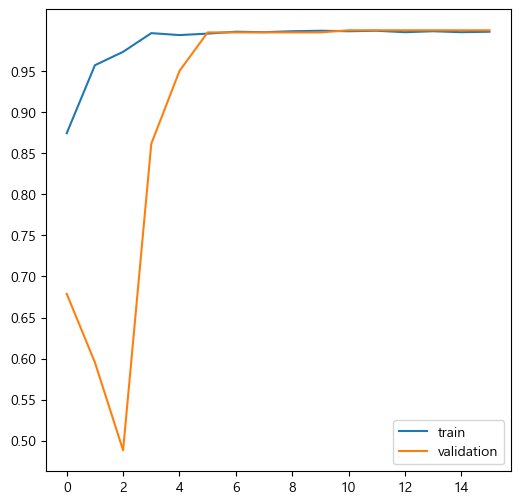

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 2Cycle

In [37]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [38]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'resnet50', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'resnet50', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'resnet50', shuffle=False)

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/2cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [40]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 250, 250, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 122, 122, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 124, 124, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 61, 61, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 61, 61, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 61, 61, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 61, 61, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 63, 63, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 61, 61, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,454 (90.28 MB)

 Trainable params: 23,622,014 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [41]:
import gc 

gc.collect()

15040

In [42]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - acc: 0.7188 - loss: 0.8683 - val_acc: 0.6110 - val_loss: 6.8377 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - acc: 0.9266 - loss: 0.2894 - val_acc: 0.9948 - val_loss: 0.0320 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - acc: 0.9545 - loss: 0.1940 - val_acc: 0.8825 - val_loss: 1.1965 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 341s 2s/step - acc: 0.9499 - loss: 0.2255 - val_acc: 0.9791 - val_loss: 0.0664 - learning_rate: 0.0010


In [43]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 542ms/step - acc: 0.9622 - loss: 0.1366


[0.09893868118524551, 0.9720279574394226]

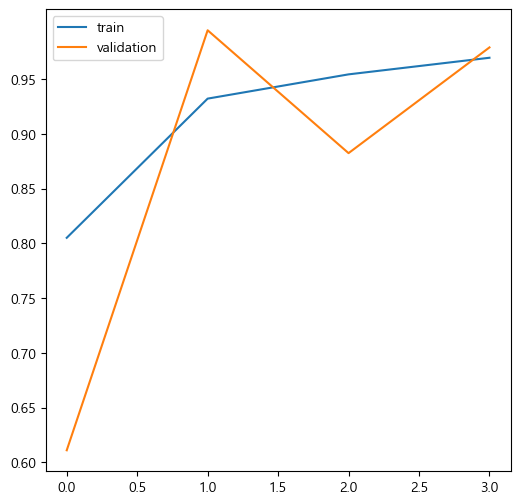

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 3Cycle

In [46]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [47]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'vgg16', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'vgg16', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'vgg16', shuffle=False)

In [48]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/3cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [49]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,542 (56.23 MB)

 Trainable params: 14,740,542 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
import gc 

gc.collect()

64352

In [51]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - acc: 0.3768 - loss: 12.4038 - val_acc: 0.8825 - val_loss: 0.3003 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - acc: 0.8598 - loss: 0.4425 - val_acc: 0.9295 - val_loss: 0.3586 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - acc: 0.7694 - loss: 1.0129 - val_acc: 0.9530 - val_loss: 0.1820 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - acc: 0.9570 - loss: 0.1199 - val_acc: 0.9687 - val_loss: 0.1954 - learning_rate: 0.0010


In [52]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 617ms/step - acc: 0.9885 - loss: 0.1491


[0.1608571708202362, 0.9836829900741577]

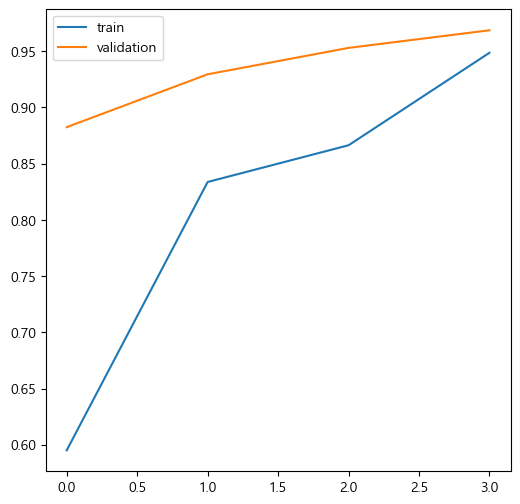

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 4Cycle

In [55]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)

In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/4cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [57]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='xception', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,134 (79.97 MB)

 Trainable params: 20,909,606 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [58]:
import gc 

gc.collect()

58639

In [59]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 464s 2s/step - acc: 0.8069 - loss: 0.5400 - val_acc: 0.6997 - val_loss: 6.1348 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - acc: 0.9655 - loss: 0.1774 - val_acc: 0.7728 - val_loss: 8.5966 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 423s 2s/step - acc: 0.9881 - loss: 0.0552 - val_acc: 0.9869 - val_loss: 0.1009 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - acc: 0.9756 - loss: 0.1821 - val_acc: 1.0000 - val_loss: 0.0015 - learning_rate: 0.0010


In [60]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 566ms/step - acc: 1.0000 - loss: 3.8574e-04


[0.00022330397041514516, 1.0]

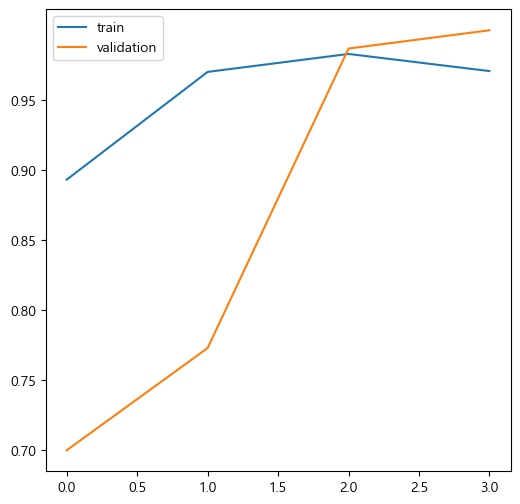

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 5ycle

In [63]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [64]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [65]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/5cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [66]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_18472\1645948085.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,238 (8.86 MB)

 Trainable params: 2,288,126 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [67]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_8 trainable: False
2 . Conv1 trainable: False
3 . bn_Conv1 trainable: False
4 . Conv1_relu trainable: False
5 . expanded_conv_depthwise trainable: False
6 . expanded_conv_depthwise_BN trainable: False
7 . expanded_conv_depthwise_relu trainable: False
8 . expanded_conv_project trainable: False
9 . expanded_conv_project_BN trainable: False
10 . block_1_expand trainable: False
11 . block_1_expand_BN trainable: False
12 . block_1_expand_relu trainable: False
13 . block_1_pad trainable: False
14 . block_1_depthwise trainable: False
15 . block_1_depthwise_BN trainable: False
16 . block_1_depthwise_relu trainable: False
17 . block_1_project trainable: False
18 . block_1_project_BN trainable: False
19 . block_2_expand trainable: False
20 . block_2_expand_BN trainable: False
21 . block_2_expand_relu trainable: False
22 . block_2_depthwise trainable: False
23 . block_2_depthwise_BN trainable: False
24 . block_2_depthwise_relu trainable: False
25 . block_2_project trainable: False

In [68]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers
import albumentations as A

# fine tuning 함수 선언
def fine_tune(datas, model_name, aug):
    # 반복 횟수
    FIRST_EPOCHS = 50
    SECOND_EPOCHS = 50

    # Unpacking (데이터 분리)
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # Dataset class로 객체 생성
    train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
    validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
    test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
  
    # 모델 생성 함수를 사용하여 모델 생성
    model = create_model(model_name='mobilenet', verbose=True)
    
    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze (분류기 빼고 모두 freeze)
    for layer in model.layers[:-5]:
        layer.trainable = False

    # 1차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=FIRST_EPOCHS, 
                        validation_data=validation_dataset,
                        callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 배치 정규화(BatchNormalization)만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:27]:
        layer.trainable = False

    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

    # 2차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=SECOND_EPOCHS,
                        validation_data=validation_dataset, 
                        callbacks=[mcp_cb, rlr_cb, ely_cb])
    
    return model, history

In [69]:
import gc 

gc.collect()

17712

In [70]:
# fine tuning 함수 호출하여 미세 조정 진행
model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                           'mobilenet',
                           aug)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_18472\1645948085.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,238 (8.86 MB)

 Trainable params: 2,288,126 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 64s 277ms/step - acc: 0.5628 - loss: 1.1277 - val_acc: 0.9347 - val_loss: 0.1839 - learning_rate: 0.0010
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 57s 266ms/step - acc: 0.9182 - loss: 0.2002 - val_acc: 0.9164 - val_loss: 0.2864 - learning_rate: 0.0010
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 57s 263ms/step - acc: 0.9738 - loss: 0.0969 - val_acc: 0.9295 - val_loss: 0.2319 - learning_rate: 0.0010
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 57s 267ms/step - acc: 0.9727 - loss: 0.0802 - val_acc: 0.9399 - val_loss: 0.1851 - learning_rate: 1.0000e-04
Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 99s 415ms/step - acc: 0.9704 - loss: 0.0795 - val_acc: 0.9843 - val_loss: 0.0654 - learning_rate: 1.0000e-05
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 80s 371ms/step - acc: 0.9939 - loss: 0.0234 - val_acc: 0.9974 - val_loss: 0.0163 - learning_rate: 1.0000e-05
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 88s 409ms/step - acc: 0.9915 - loss: 0.0277 - val_acc: 0.9869 - val_loss: 0.06

In [71]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - acc: 1.0000 - loss: 2.5745e-06


[2.020659394474933e-06, 1.0]

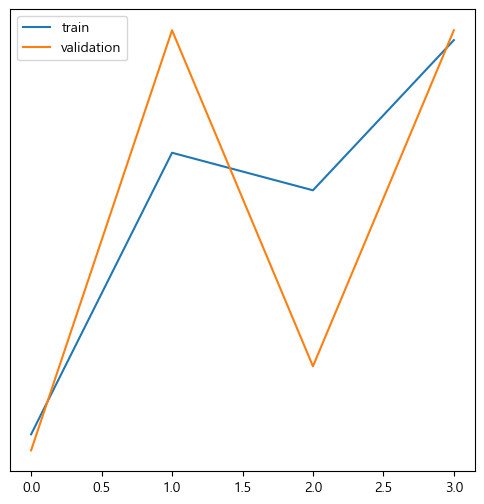

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 결과

In [53]:
data = {
    'model': ['mobilenet', 'resnet50', 'vgg16', 'xception', '미세조정'],
    'acc': [0.9969, 0.9499, 0.9570, 0.9756, 0.9966],
    'val_acc': [1.0000, 0.9791, 0.9687, 1.0000, 0.9974],
}

results_df = pd.DataFrame(data)

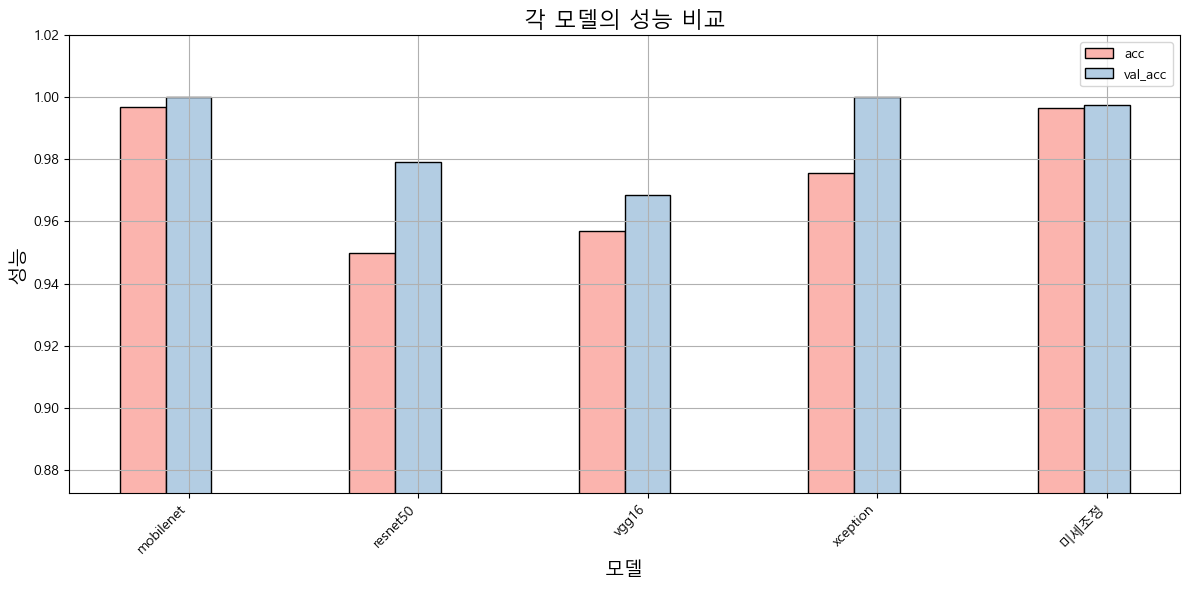

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = results_df['model']
accuracy = results_df['acc']
val_accuracy = results_df['val_acc']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 6))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='acc', edgecolor='black')
plt.bar(index + bar_width, val_accuracy, color=cmap(np.array([1])), width=bar_width, label='val_acc', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# y축의 범위 지정
plt.ylim(0.8725, 1.02)

plt.tight_layout()
plt.show()

In [25]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [26]:
import matplotlib.pyplot as plt
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

In [30]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
model.load_weights('./callback_files/weights.016-0.0018-0.9982.weights.h5')
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_9676\1645948085.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,238 (8.86 MB)

 Trainable params: 2,288,126 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


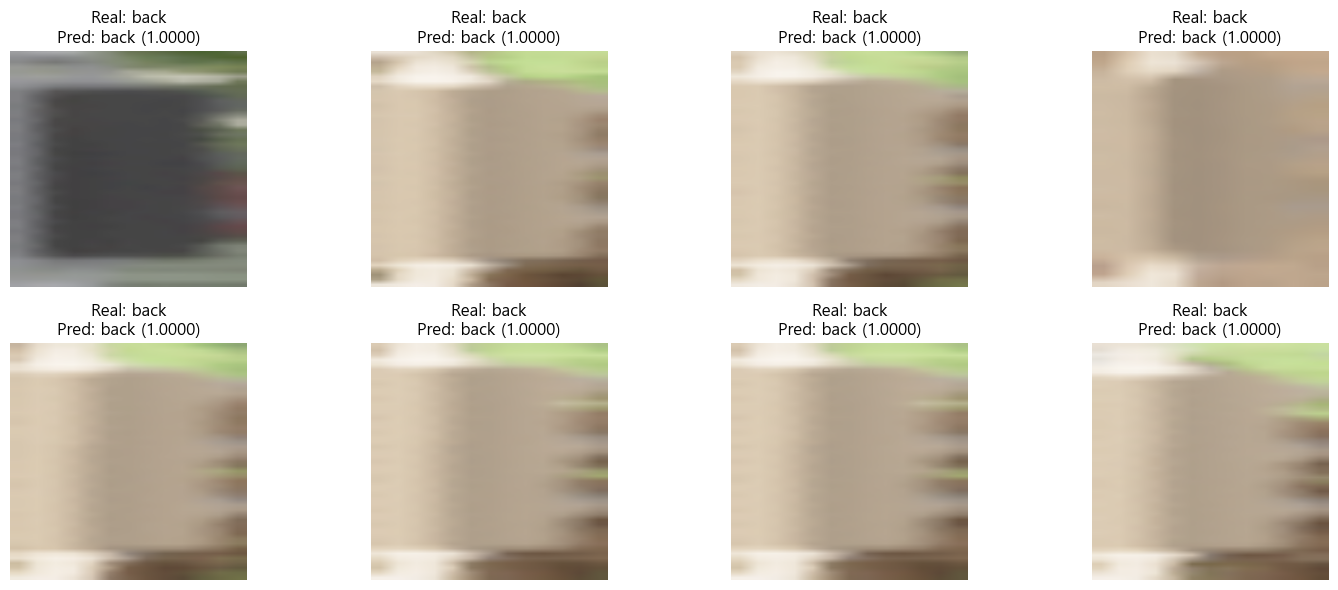

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 10
end_index = 18

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = mobilenet_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


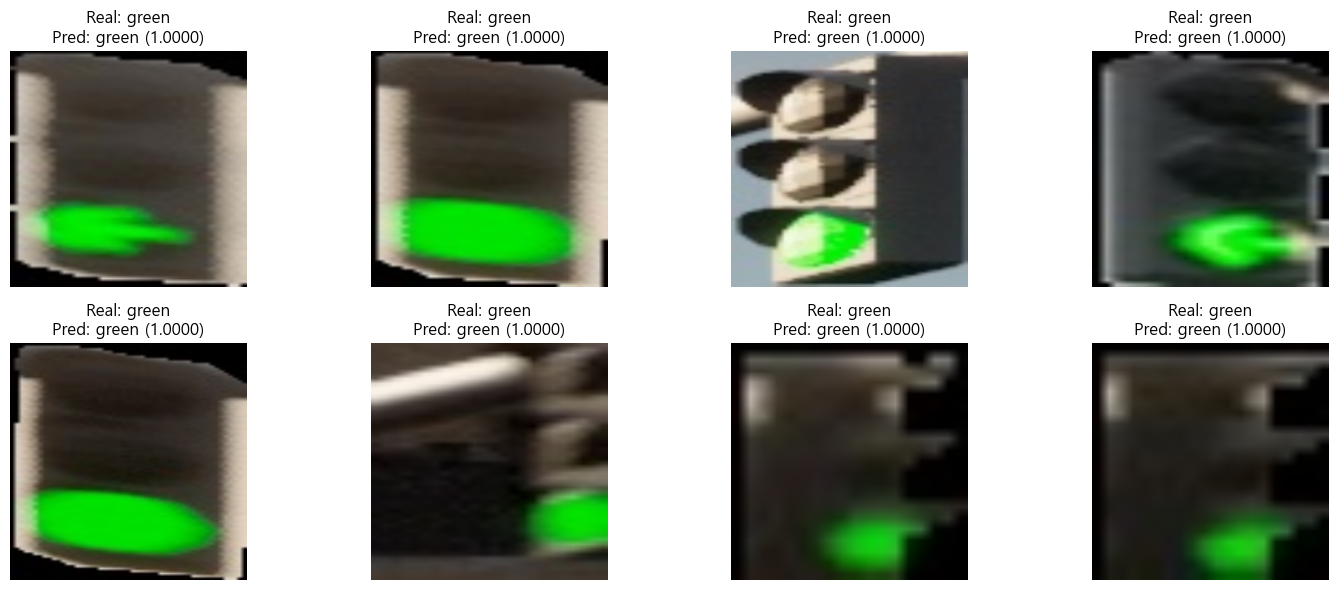

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 500
end_index = 508

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = mobilenet_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


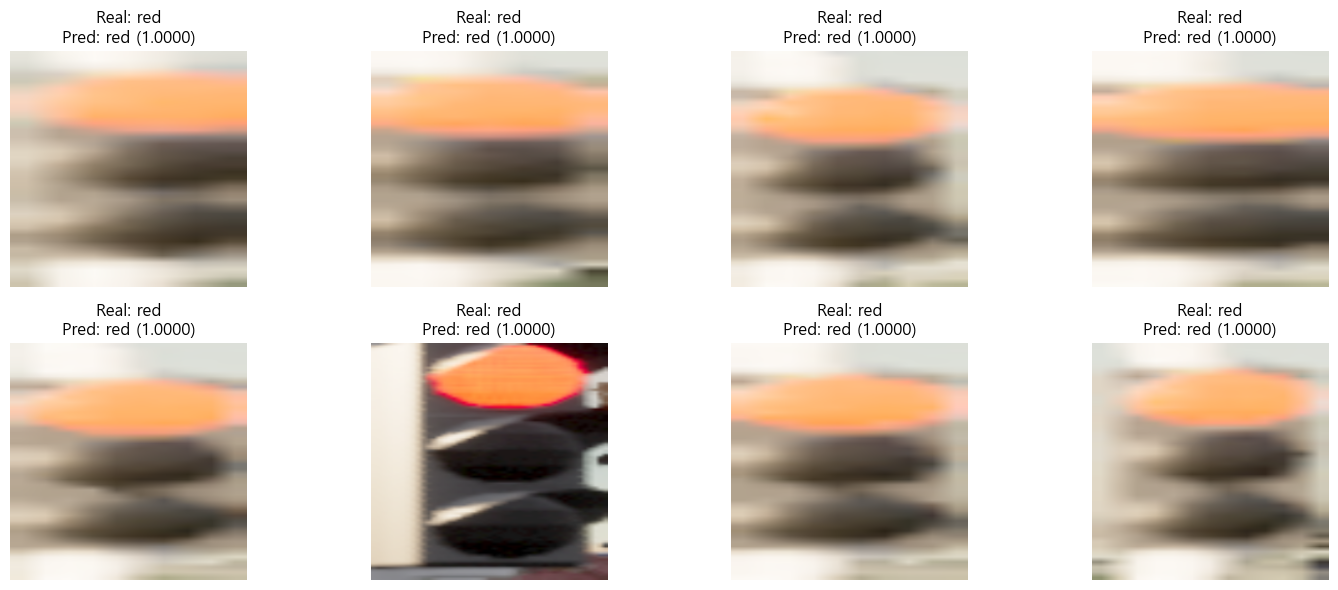

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 1000
end_index = 1008

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = mobilenet_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


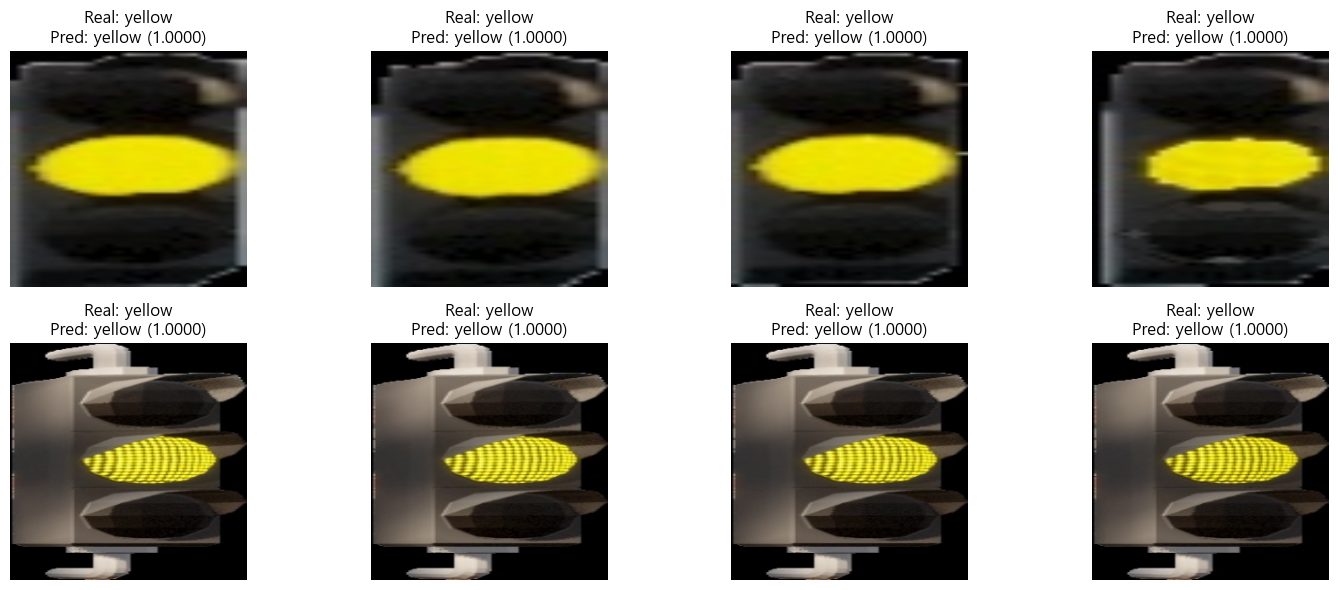

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 클래스 이름 지정
class_names = ['back', 'green', 'red', 'yellow']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 1600
end_index = 1608

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = mobilenet_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()
